# About Dataset
In this competition you’re tasked to build an algorithm that predicts whether a user will churn after their subscription expires. Currently, the company uses survival analysis techniques to determine the residual membership life time for each subscriber. By adopting different methods, KKBOX anticipates they’ll discover new insights to why users leave so they can be proactive in keeping users dancing.

                             ***Tables-***

**train.csv**
the train set, containing the user ids and whether they have churned.

**msno:** user id

**is_churn:** This is the target variable. Churn is defined as whether the user did not continue the subscription within 30 days of expiration. is_churn = 1 means churn,is_churn = 0 means renewal.

**transactions.csv**

transactions of users up until 2/28/2017.

**msno:** user id

**payment_method_id:** payment method

**payment_plan_days:** length of membership plan in days

**plan_list_price:** in New Taiwan Dollar (NTD)

**actual_amount_paid:** in New Taiwan Dollar (NTD)

**is_auto_renew**

**transaction_date:** format %Y%m%d

**membership_expire_date:** format %Y%m%d

**is_cancel:** whether or not the user canceled the membership in this transaction.


**user_logs.csv**
daily user logs describing listening behaviors of a user. Data collected until 2/28/2017.

**msno:** user id

**date:** format %Y%m%d

**num_25:** # of songs played less than 25% of the song length

**num_50:** # of songs played between 25% to 50% of the song length

**num_75:** # of songs played between 50% to 75% of of the song length

**num_985:** # of songs played between 75% to 98.5% of the song length

**num_100:** # of songs played over 98.5% of the song length

**num_unq:** # of unique songs played

**total_secs:** total seconds played


**members.csv**
user information. Note that not every user in the dataset is available.

**msno**

**city**

**bd:** age. Note: this column has outlier values ranging from -7000 to 2015, 
please use your judgement.

**gender**

**registered_via:** registration method

**registration_init_time:** format %Y%m%d

**expiration_date:** format %Y%m%d, taken as a snapshot at which the member.csv is 
extracted. Not representing the actual churn behavior.

In [ ]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from datetime import datetime

In [ ]:
#df=pd.read_csv('/content/drive/MyDrive/DS Aegis/PortFolio/KKBox Churn Prediction/train_features.csv')

In [ ]:
#df=df.sample(frac=0.1)

In [ ]:
#df.to_csv('sampled merged KKBox churn dataset.csv')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DS Aegis/PortFolio/KKBox Churn Prediction/sampled merged KKBox churn dataset.csv')

In [ ]:
df.shape

(196389, 32)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,city_y,bd_y,gender_y,registered_via_y,registration_init_time_y,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,1467196,1467196,KbnosFBjAPjGAMrTckIl9VLiaSk/3sYosF49L63i6s8=,0,17,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,41,30,99,99,1,20170322,20170422,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,721020,721020,75WNi582TMGl1OMJb6G1ydFXOxjxD5CvFtWLBN8vKgo=,0,27,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,41,30,149,149,1,20170320,20170420,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,1362157,1362157,8UQ3H39vR9b8UrBG0mnUMlFzHka27HgvSbfUMz8sOoQ=,0,7,29.0,1.0,0.0,0,7.0,20160913.0,1.0,0.0,0,7.0,20160913.0,41,30,99,99,1,20170312,20170412,0,20170330.0,9.0,7.0,1.0,0.0,18.0,35.0,5801.024
3,180078,180078,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,20091129.0,13.0,23.0,female,9.0,20091129.0,37,30,149,149,1,20170304,20170403,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315
4,1246023,1246023,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,0.0,0,7.0,20151021.0,1.0,0.0,0,7.0,20151021.0,41,30,99,99,1,20170321,20170421,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698


In [ ]:
df=df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
df.head()


,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,city_y,bd_y,gender_y,registered_via_y,registration_init_time_y,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,KbnosFBjAPjGAMrTckIl9VLiaSk/3sYosF49L63i6s8=,0,17,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,41,30,99,99,1,20170322,20170422,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,75WNi582TMGl1OMJb6G1ydFXOxjxD5CvFtWLBN8vKgo=,0,27,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,41,30,149,149,1,20170320,20170420,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,8UQ3H39vR9b8UrBG0mnUMlFzHka27HgvSbfUMz8sOoQ=,0,7,29.0,1.0,0.0,0,7.0,20160913.0,1.0,0.0,0,7.0,20160913.0,41,30,99,99,1,20170312,20170412,0,20170330.0,9.0,7.0,1.0,0.0,18.0,35.0,5801.024
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,20091129.0,13.0,23.0,female,9.0,20091129.0,37,30,149,149,1,20170304,20170403,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,0.0,0,7.0,20151021.0,1.0,0.0,0,7.0,20151021.0,41,30,99,99,1,20170321,20170421,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698


In [ ]:
df.is_churn.value_counts() # checking the distribution of target variable

0    181310
1     15079
Name: is_churn, dtype: int64

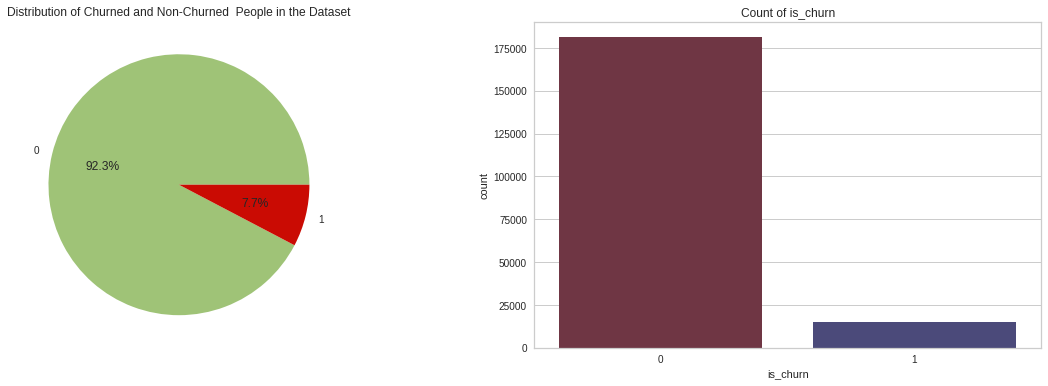

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
plt.pie(x=df.is_churn.value_counts(), labels=df.is_churn.value_counts().index, autopct='%.1f%%', colors='gr')
plt.title("Distribution of Churned and Non-Churned  People in the Dataset")

plt.subplot(122)
sns.countplot(data=df, x=df.is_churn,palette='icefire_r' )
plt.title('Count of is_churn')

plt.show()


In [ ]:
df.isna().sum() # so we dont have any missing values in the sampled dataset

msno                        0
is_churn                    0
trans_count                 0
logs_count                  0
city_x                      0
bd_x                        0
gender_x                    0
registered_via_x            0
registration_init_time_x    0
city_y                      0
bd_y                        0
gender_y                    0
registered_via_y            0
registration_init_time_y    0
payment_method_id           0
payment_plan_days           0
plan_list_price             0
actual_amount_paid          0
is_auto_renew               0
transaction_date            0
membership_expire_date      0
is_cancel                   0
date                        0
num_25                      0
num_50                      0
num_75                      0
num_985                     0
num_100                     0
num_unq                     0
total_secs                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196389 entries, 0 to 196388
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   msno                      196389 non-null  object 
 1   is_churn                  196389 non-null  int64  
 2   trans_count               196389 non-null  int64  
 3   logs_count                196389 non-null  float64
 4   city_x                    196389 non-null  float64
 5   bd_x                      196389 non-null  float64
 6   gender_x                  196389 non-null  object 
 7   registered_via_x          196389 non-null  float64
 8   registration_init_time_x  196389 non-null  float64
 9   city_y                    196389 non-null  float64
 10  bd_y                      196389 non-null  float64
 11  gender_y                  196389 non-null  object 
 12  registered_via_y          196389 non-null  float64
 13  registration_init_time_y  196389 non-null  f

In [ ]:
df.registration_init_time_x=df.registration_init_time_x.astype('int64') 

In [ ]:
# We have a few repeated columns as we have merged different datasets, so lets get rid of those columns first

In [ ]:
df=df.drop(['city_y','bd_y', 'gender_y', 'registered_via_y', 'registration_init_time_y'], axis=1)

In [ ]:
df.shape

(196389, 25)

# EDA and Preprocessing

## City

In [ ]:
d=df.groupby('city_x').aggregate({'msno':'count'}).reset_index() # We have 21 unique cities
d

,city_x,msno
0,0.0,22314
1,1.0,89734
2,3.0,1029
3,4.0,9463
4,5.0,14262
5,6.0,5215
6,7.0,567
7,8.0,1558
8,9.0,1840
9,10.0,1329


In [ ]:
import warnings
warnings.filterwarnings('ignore')

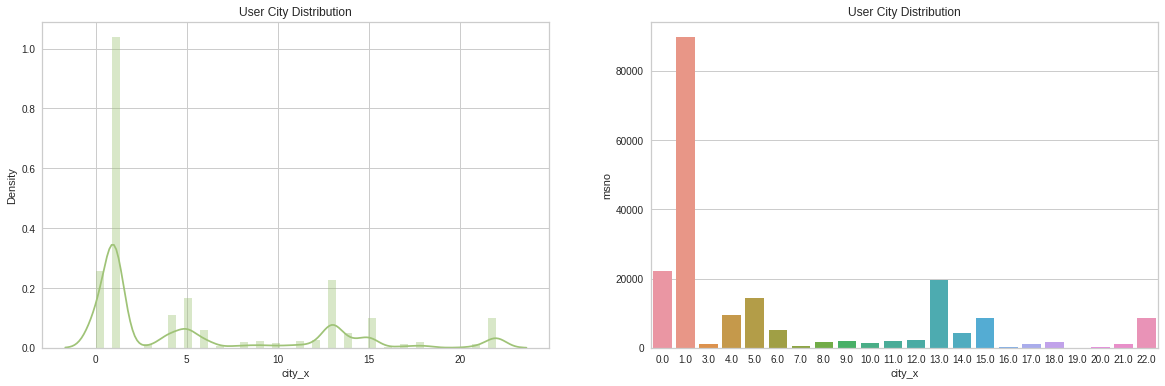

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.distplot(df.city_x, kde=True, color="g").set_title('User City Distribution')

plt.subplot(122)
sns.barplot(x='city_x', y='msno', data=d).set_title('User City Distribution')
plt.show()

In [ ]:
##

## Gender

In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(i, df[i].unique())

msno ['KbnosFBjAPjGAMrTckIl9VLiaSk/3sYosF49L63i6s8='
 '75WNi582TMGl1OMJb6G1ydFXOxjxD5CvFtWLBN8vKgo='
 '8UQ3H39vR9b8UrBG0mnUMlFzHka27HgvSbfUMz8sOoQ=' ...
 'y0bEWP5i+HFPwux8edRMneFAAfENDusY2m22sx06qzI='
 '++boFsOAGvAI3O+P4RG9O+p7e/dF7JdGb6/b+mf0ahk='
 'Kwe4HMBv16keDk6ri/k6I8xrdV6rbfobeo9I8yVAaRI=']
gender_x ['0' 'female' 'male']


In [ ]:
df.gender_x.replace('0',np.nan,inplace=True)

In [ ]:
df.gender_x.fillna(method='ffill',inplace=True)

In [ ]:
df.gender_x.value_counts()

male      103186
female     93200
Name: gender_x, dtype: int64

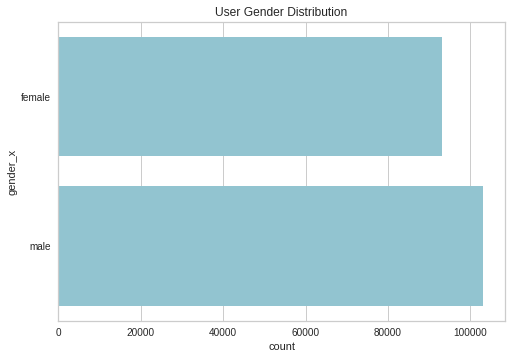

In [ ]:
sns.countplot(y="gender_x", data=df, color="c").set_title('User Gender Distribution') 
plt.show()

is_churn,0,1,Ratio
gender_x,,,
female,86039,7161,0.083230
male,95268,7918,0.083113


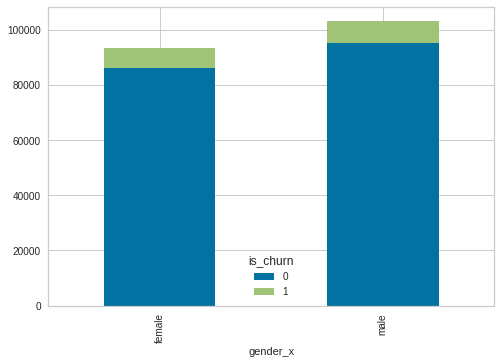

In [ ]:
gender_crosstab=pd.crosstab(df['gender_x'],df['is_churn'])
gender_crosstab.plot(kind='bar', stacked=True)

gender_crosstab["Ratio"] =  gender_crosstab[1] / gender_crosstab[0]
gender_crosstab # so we can see that we have almost exual ratio of male and female churn in our dataset 

## Age

In [ ]:
df.bd_x.nunique() # 132 unique age values

132

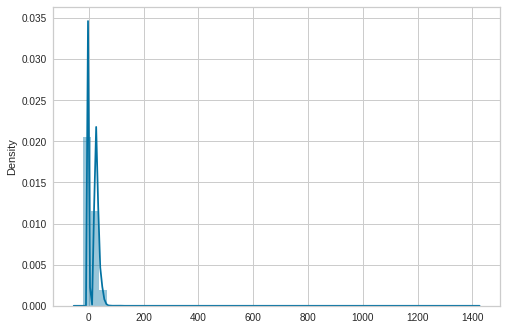

In [ ]:
sns.distplot(x=df.bd_x) # we have lot of outliers and 0 and negative values, lets treat them and visualize again

In [ ]:
df['bd_x'] = df.bd_x.apply(lambda x: -1 if float(x)<=1 else x )
df['bd_x'] = df.bd_x.apply(lambda x: -1 if float(x)>=100 else x )

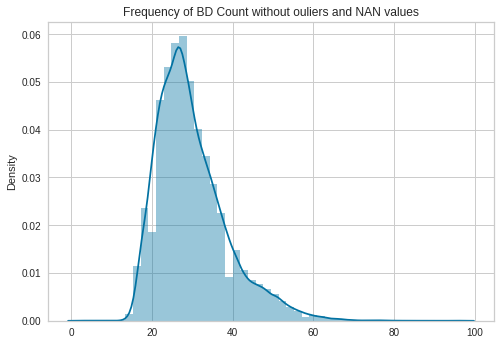

In [ ]:
tmp_bd = df[(df.bd_x != "NAN") & (df.bd_x != -1)] # storing in temporary variable 
sns.distplot(x=tmp_bd.bd_x)
plt.title("Frequency of BD Count without ouliers and NAN values", fontsize=12)
plt.show()

In [ ]:
tmp_bd.bd_x.value_counts()

27.0    4654
26.0    4519
28.0    4173
25.0    4094
24.0    4023
        ... 
86.0       1
92.0       1
84.0       1
81.0       1
90.0       1
Name: bd_x, Length: 92, dtype: int64

In [ ]:
mean_age=tmp_bd.bd_x.mean()
print(mean_age)

median_age=tmp_bd.bd_x.median()
print(median_age)


29.910092896735783
28.0


In [ ]:
df.bd_x=df.bd_x.replace(-1, median_age)

In [ ]:
df.bd_x.value_counts()

28.0    122626
27.0      4654
26.0      4519
25.0      4094
24.0      4023
         ...  
86.0         1
92.0         1
84.0         1
81.0         1
90.0         1
Name: bd_x, Length: 92, dtype: int64

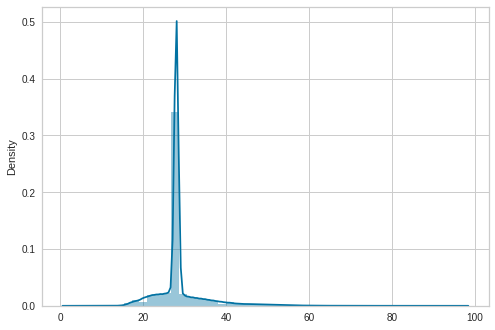

In [ ]:
sns.distplot(x=df.bd_x)
plt.show()

## registration methods

In [ ]:
df.registered_via_x.unique() # We have 6 methods of registration

array([ 0.,  7.,  9.,  3.,  4., 13.])

In [ ]:
df.registered_via_x.value_counts()

7.0     94643
9.0     47433
0.0     22314
3.0     21191
4.0     10126
13.0      682
Name: registered_via_x, dtype: int64

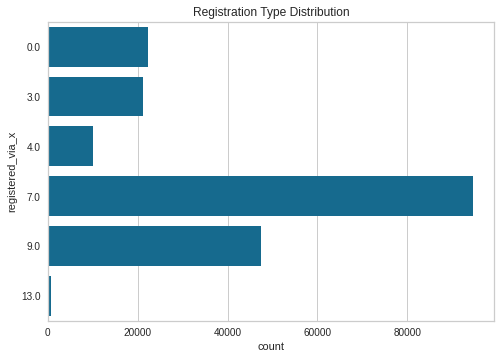

In [ ]:
sns.countplot(y="registered_via_x", data=df, color="b").set_title('Registration Type Distribution')
plt.show() # Registration type 7 is the most common method prefered by the users in the dataset

## Dates

In [ ]:
df.head()

,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,KbnosFBjAPjGAMrTckIl9VLiaSk/3sYosF49L63i6s8=,0,17,0.0,0.0,28.0,NaN,0.0,0,41,30,99,99,1,20170322,20170422,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,75WNi582TMGl1OMJb6G1ydFXOxjxD5CvFtWLBN8vKgo=,0,27,0.0,0.0,28.0,NaN,0.0,0,41,30,149,149,1,20170320,20170420,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,8UQ3H39vR9b8UrBG0mnUMlFzHka27HgvSbfUMz8sOoQ=,0,7,29.0,1.0,28.0,NaN,7.0,20160913,41,30,99,99,1,20170312,20170412,0,20170330.0,9.0,7.0,1.0,0.0,18.0,35.0,5801.024
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,20091129,37,30,149,149,1,20170304,20170403,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,28.0,female,7.0,20151021,41,30,99,99,1,20170321,20170421,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698


In [ ]:
df=df.drop('date', axis=1)

In [ ]:
df.registration_init_time_x.replace(0,np.nan,inplace=True)

In [ ]:
# lets convert Date to correct format
df.registration_init_time_x = pd.to_datetime(df.registration_init_time_x, format='%Y%m%d', errors='ignore')
df.transaction_date = pd.to_datetime(df.transaction_date, format='%Y%m%d', errors='ignore')
df.membership_expire_date = pd.to_datetime(df.membership_expire_date, format='%Y%m%d', errors='ignore')


In [ ]:
df.head()

,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,KbnosFBjAPjGAMrTckIl9VLiaSk/3sYosF49L63i6s8=,0,17,0.0,0.0,28.0,NaN,0.0,NaT,41,30,99,99,1,2017-03-22,2017-04-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,75WNi582TMGl1OMJb6G1ydFXOxjxD5CvFtWLBN8vKgo=,0,27,0.0,0.0,28.0,NaN,0.0,NaT,41,30,149,149,1,2017-03-20,2017-04-20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,8UQ3H39vR9b8UrBG0mnUMlFzHka27HgvSbfUMz8sOoQ=,0,7,29.0,1.0,28.0,NaN,7.0,2016-09-13,41,30,99,99,1,2017-03-12,2017-04-12,0,20170330.0,9.0,7.0,1.0,0.0,18.0,35.0,5801.024
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,2009-11-29,37,30,149,149,1,2017-03-04,2017-04-03,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,28.0,female,7.0,2015-10-21,41,30,99,99,1,2017-03-21,2017-04-21,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196389 entries, 0 to 196388
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   msno                      196389 non-null  object        
 1   is_churn                  196389 non-null  int64         
 2   trans_count               196389 non-null  int64         
 3   logs_count                196389 non-null  float64       
 4   city_x                    196389 non-null  float64       
 5   bd_x                      196389 non-null  float64       
 6   gender_x                  196386 non-null  object        
 7   registered_via_x          196389 non-null  float64       
 8   registration_init_time_x  174075 non-null  datetime64[ns]
 9   payment_method_id         196389 non-null  int64         
 10  payment_plan_days         196389 non-null  int64         
 11  plan_list_price           196389 non-null  int64         
 12  ac

In [ ]:
df.head()

,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,KbnosFBjAPjGAMrTckIl9VLiaSk/3sYosF49L63i6s8=,0,17,0.0,0.0,28.0,NaN,0.0,NaT,41,30,99,99,1,2017-03-22,2017-04-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,75WNi582TMGl1OMJb6G1ydFXOxjxD5CvFtWLBN8vKgo=,0,27,0.0,0.0,28.0,NaN,0.0,NaT,41,30,149,149,1,2017-03-20,2017-04-20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,8UQ3H39vR9b8UrBG0mnUMlFzHka27HgvSbfUMz8sOoQ=,0,7,29.0,1.0,28.0,NaN,7.0,2016-09-13,41,30,99,99,1,2017-03-12,2017-04-12,0,20170330.0,9.0,7.0,1.0,0.0,18.0,35.0,5801.024
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,2009-11-29,37,30,149,149,1,2017-03-04,2017-04-03,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,28.0,female,7.0,2015-10-21,41,30,99,99,1,2017-03-21,2017-04-21,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698


In [ ]:
df.isna().sum()

msno                            0
is_churn                        0
trans_count                     0
logs_count                      0
city_x                          0
bd_x                            0
gender_x                        3
registered_via_x                0
registration_init_time_x    22314
payment_method_id               0
payment_plan_days               0
plan_list_price                 0
actual_amount_paid              0
is_auto_renew                   0
transaction_date                0
membership_expire_date          0
is_cancel                       0
date                            0
num_25                          0
num_50                          0
num_75                          0
num_985                         0
num_100                         0
num_unq                         0
total_secs                      0
dtype: int64

In [ ]:
df.registration_init_time_x = pd.to_datetime(df.registration_init_time_x, format='%Y%m%d', errors='ignore')

In [ ]:
df.head()

,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,KbnosFBjAPjGAMrTckIl9VLiaSk/3sYosF49L63i6s8=,0,17,0.0,0.0,28.0,NaN,0.0,NaT,41,30,99,99,1,2017-03-22,2017-04-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,75WNi582TMGl1OMJb6G1ydFXOxjxD5CvFtWLBN8vKgo=,0,27,0.0,0.0,28.0,NaN,0.0,NaT,41,30,149,149,1,2017-03-20,2017-04-20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,8UQ3H39vR9b8UrBG0mnUMlFzHka27HgvSbfUMz8sOoQ=,0,7,29.0,1.0,28.0,NaN,7.0,2016-09-13,41,30,99,99,1,2017-03-12,2017-04-12,0,20170330.0,9.0,7.0,1.0,0.0,18.0,35.0,5801.024
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,2009-11-29,37,30,149,149,1,2017-03-04,2017-04-03,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,28.0,female,7.0,2015-10-21,41,30,99,99,1,2017-03-21,2017-04-21,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698


In [ ]:
df=df.dropna()

In [ ]:
df.isna().sum()

msno                        0
is_churn                    0
trans_count                 0
logs_count                  0
city_x                      0
bd_x                        0
gender_x                    0
registered_via_x            0
registration_init_time_x    0
payment_method_id           0
payment_plan_days           0
plan_list_price             0
actual_amount_paid          0
is_auto_renew               0
transaction_date            0
membership_expire_date      0
is_cancel                   0
date                        0
num_25                      0
num_50                      0
num_75                      0
num_985                     0
num_100                     0
num_unq                     0
total_secs                  0
dtype: int64

In [ ]:
df.shape


(174074, 25)

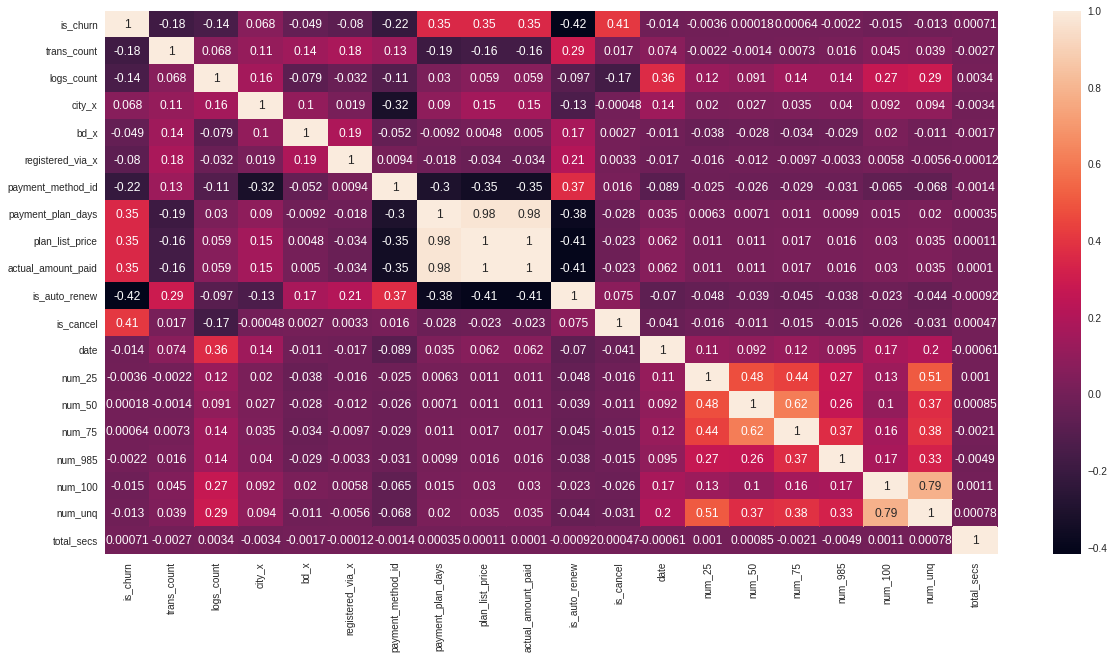

In [ ]:
# lets check correlation 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Feature Extraction

## Discount

In [ ]:
df['discount'] = df['plan_list_price'] - df['actual_amount_paid']
df.discount.unique()

array([  0,  50, 149,  20, 180,  30, 120])

In [ ]:
df['is_discount'] = df.discount.apply(lambda x: 1 if x > 0 else 0)
df.is_discount.value_counts()

0    173759
1       315
Name: is_discount, dtype: int64

## Amount paid by user per day

In [ ]:
df['amt_per_day'] = df['actual_amount_paid'] / df['payment_plan_days']
df['amt_per_day'].describe()

count    174074.000000
mean          4.385170
std           0.982959
min           0.000000
25%           3.300000
50%           4.966667
75%           4.966667
max           6.000000
Name: amt_per_day, dtype: float64

## membership_duration

In [ ]:
#--- difference in days ---
df['membership_duration'] = df.membership_expire_date - df.transaction_date
df['membership_duration'] = df['membership_duration'] / np.timedelta64(1, 'D')
df['membership_duration'] = df['membership_duration'].astype(int)

In [ ]:
df['membership_duration'].value_counts() # mostly people prefer 30 days plan

31     75070
30     55132
32      9688
0       3472
33      3121
       ...  
326        1
352        1
446        1
474        1
771        1
Name: membership_duration, Length: 474, dtype: int64

In [ ]:
df.payment_plan_days.value_counts()

30     168319
410      1355
90        944
195       931
180       747
7         572
360       254
100       209
120       185
395       113
60         97
200        88
400        53
45         49
365        43
240        37
1          23
450        21
10         13
270         4
14          4
415         3
80          3
3           2
230         2
110         1
35          1
70          1
Name: payment_plan_days, dtype: int64

## Registration duration

In [ ]:
#--- difference in days ---
df['registration_duration'] = df.membership_expire_date - df.registration_init_time_x
df['registration_duration'] = df['registration_duration'] / np.timedelta64(1, 'D')
df['registration_duration'] = df['registration_duration'].astype(int)

In [ ]:
df['registration_duration'].describe() # average of 1323 days since registered, 

count    174074.000000
mean       1323.329722
std        1099.940520
min      -16352.000000
25%         456.000000
50%        1065.000000
75%        1896.000000
max        5328.000000
Name: registration_duration, dtype: float64

In [ ]:
long_term_users=df[df['registration_duration']>365]
long_term_users # 142371 users have been using the app for more than a year

,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,discount,is_discount,amt_per_day,membership_duration,registration_duration
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,2009-11-29,37,30,149,149,1,2017-03-04,2017-04-03,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315,0,0,4.966667,30,2682
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,28.0,female,7.0,2015-10-21,41,30,99,99,1,2017-03-21,2017-04-21,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698,0,0,3.300000,31,548
5,noUcxTUzZqgUVjSwrf2vVUL3MK27mH9D+4ggKLa7ML4=,0,27,22.0,5.0,34.0,male,3.0,2015-01-19,40,30,149,149,1,2017-03-27,2017-04-26,0,20170331.0,0.0,0.0,1.0,0.0,8.0,9.0,2298.790,0,0,4.966667,30,828
8,zaFyyMnHWczQLQApdBGbR8tKjjvF9iDUDWF89g0cj1A=,0,11,11.0,13.0,45.0,female,9.0,2010-04-12,36,30,180,180,1,2017-03-08,2017-04-07,0,20170327.0,0.0,0.0,0.0,0.0,4.0,4.0,1051.304,0,0,6.000000,30,2552
10,BTqGMXLHa5E39hsdkbNH8B9+ewExlC/OYqXbVoURgrw=,0,23,27.0,22.0,28.0,male,9.0,2004-07-27,33,30,149,149,1,2017-03-31,2017-04-30,0,20170331.0,2.0,0.0,0.0,0.0,58.0,56.0,14411.608,0,0,4.966667,30,4660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196381,mzqZlaVEEIeK/fCQlvWqf40NxsiTFo5erleULGIuqQ8=,0,27,29.0,1.0,28.0,male,7.0,2012-04-16,41,30,149,149,1,2017-03-15,2017-04-16,0,20170331.0,9.0,3.0,3.0,7.0,52.0,59.0,15641.194,0,0,4.966667,32,1826
196384,J+9p9s5QOLcudsQwerQEv9XAb0yBRofuYiAg/zEC+B8=,0,28,4.0,6.0,29.0,female,3.0,2012-01-16,40,30,149,149,1,2017-03-19,2017-04-20,0,20170322.0,0.0,1.0,1.0,0.0,2.0,4.0,734.642,0,0,4.966667,32,1921
196385,xCZ58GQNEwUgUz9psWBxZFQ3NRTHemSqIT+HfTj1SEQ=,0,18,0.0,7.0,24.0,female,9.0,2015-03-08,41,30,149,149,1,2017-03-19,2017-04-19,0,20161124.0,1.0,0.0,1.0,0.0,10.0,8.0,2685.242,0,0,4.966667,31,773
196386,y0bEWP5i+HFPwux8edRMneFAAfENDusY2m22sx06qzI=,1,11,0.0,14.0,26.0,male,9.0,2011-01-15,38,30,149,149,0,2017-01-05,2017-02-04,0,20170207.0,0.0,0.0,0.0,1.0,0.0,1.0,254.616,0,0,4.966667,30,2212


Since, membership duration is very less as compared to registration duration;
it is highly likely that customers renew their membership on a monthly or quarterly basis.

## Autorenew & cancel

In [ ]:
df.columns

Index(['msno', 'is_churn', 'trans_count', 'logs_count', 'city_x', 'bd_x',
       'gender_x', 'registered_via_x', 'registration_init_time_x',
       'payment_method_id', 'payment_plan_days', 'plan_list_price',
       'actual_amount_paid', 'is_auto_renew', 'transaction_date',
       'membership_expire_date', 'is_cancel', 'date', 'num_25', 'num_50',
       'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs', 'discount',
       'is_discount', 'amt_per_day', 'membership_duration',
       'registration_duration'],
      dtype='object')

In [ ]:
pd.crosstab(df.is_auto_renew, df.is_cancel) # only 6355 people whose subscription got autorenewed cancelled the subscription

is_cancel,0,1
is_auto_renew,,
0,22523,0
1,145196,6355


In [ ]:
df.describe()

,is_churn,trans_count,logs_count,city_x,bd_x,registered_via_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,discount,is_discount,amt_per_day,membership_duration,registration_duration
count,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,1.740740e+05,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000,1.740740e+05,174074.000000,174074.000000,174074.000000,174074.000000,174074.000000
mean,0.079874,17.245126,15.403426,5.929013,28.855182,6.907028,38.639780,36.039667,156.876530,156.696388,0.870612,0.036507,1.891295e+07,4.555114,1.074302,0.667498,0.756948,19.955507,20.524880,-5.298535e+10,0.180142,0.001810,4.385170,38.402260,1323.329722
std,0.271099,8.738327,10.937920,6.444552,6.002584,1.921894,3.925449,41.601218,176.021163,176.092747,0.335629,0.187550,4.875025e+06,10.891380,3.017248,1.493568,2.063744,30.284101,26.252238,2.210664e+13,4.859030,0.042501,0.982959,61.955311,1099.940520
min,0.000000,1.000000,0.000000,1.000000,2.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.223372e+15,0.000000,0.000000,0.000000,-17207.000000,-16352.000000
25%,0.000000,10.000000,5.000000,1.000000,28.000000,7.000000,37.000000,30.000000,99.000000,99.000000,1.000000,0.000000,2.017032e+07,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,9.193853e+02,0.000000,0.000000,3.300000,30.000000,456.000000
50%,0.000000,18.000000,16.000000,1.000000,28.000000,7.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,2.017033e+07,1.000000,0.000000,0.000000,0.000000,10.000000,12.000000,2.756434e+03,0.000000,0.000000,4.966667,31.000000,1065.000000
75%,0.000000,25.000000,26.000000,13.000000,28.000000,9.000000,41.000000,30.000000,149.000000,149.000000,1.000000,0.000000,2.017033e+07,5.000000,1.000000,1.000000,1.000000,25.000000,27.000000,6.569866e+03,0.000000,0.000000,4.966667,31.000000,1896.000000
max,1.000000,173.000000,31.000000,22.000000,97.000000,13.000000,41.000000,450.000000,2000.000000,2000.000000,1.000000,1.000000,2.017033e+07,598.000000,236.000000,73.000000,134.000000,2216.000000,768.000000,5.510295e+05,180.000000,1.000000,6.000000,1382.000000,5328.000000


In [ ]:
df.head()

,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,discount,is_discount,amt_per_day,membership_duration,registration_duration
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,female,9.0,2009-11-29,37,30,149,149,1,2017-03-04,2017-04-03,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315,0,0,4.966667,30,2682
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,28.0,female,7.0,2015-10-21,41,30,99,99,1,2017-03-21,2017-04-21,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698,0,0,3.300000,31,548
5,noUcxTUzZqgUVjSwrf2vVUL3MK27mH9D+4ggKLa7ML4=,0,27,22.0,5.0,34.0,male,3.0,2015-01-19,40,30,149,149,1,2017-03-27,2017-04-26,0,20170331.0,0.0,0.0,1.0,0.0,8.0,9.0,2298.790,0,0,4.966667,30,828
6,YQgllSmBodMLzkeroN78/cWo5J46fxwiOvn5eriFqtY=,1,1,25.0,5.0,26.0,male,4.0,2016-08-08,29,30,180,180,0,2017-02-26,2017-03-28,0,20170329.0,13.0,1.0,1.0,2.0,39.0,29.0,9046.457,0,0,6.000000,30,232
8,zaFyyMnHWczQLQApdBGbR8tKjjvF9iDUDWF89g0cj1A=,0,11,11.0,13.0,45.0,female,9.0,2010-04-12,36,30,180,180,1,2017-03-08,2017-04-07,0,20170327.0,0.0,0.0,0.0,0.0,4.0,4.0,1051.304,0,0,6.000000,30,2552


# Model data preparation

In [ ]:
X=df.drop(['msno','is_churn'], axis=1)
y=df.is_churn

In [ ]:
X.head()

,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,registration_init_time_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,discount,is_discount,amt_per_day,membership_duration,registration_duration
3,27,15.0,13.0,23.0,female,9.0,2009-11-29,37,30,149,149,1,2017-03-04,2017-04-03,0,1.0,0.0,0.0,0.0,1.0,1.0,307.315,0,0,4.966667,30,2682
4,18,0.0,1.0,28.0,female,7.0,2015-10-21,41,30,99,99,1,2017-03-21,2017-04-21,0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698,0,0,3.300000,31,548
5,27,22.0,5.0,34.0,male,3.0,2015-01-19,40,30,149,149,1,2017-03-27,2017-04-26,0,0.0,0.0,1.0,0.0,8.0,9.0,2298.790,0,0,4.966667,30,828
6,1,25.0,5.0,26.0,male,4.0,2016-08-08,29,30,180,180,0,2017-02-26,2017-03-28,0,13.0,1.0,1.0,2.0,39.0,29.0,9046.457,0,0,6.000000,30,232
8,11,11.0,13.0,45.0,female,9.0,2010-04-12,36,30,180,180,1,2017-03-08,2017-04-07,0,0.0,0.0,0.0,0.0,4.0,4.0,1051.304,0,0,6.000000,30,2552


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174074 entries, 3 to 196388
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   trans_count               174074 non-null  int64         
 1   logs_count                174074 non-null  float64       
 2   city_x                    174074 non-null  float64       
 3   bd_x                      174074 non-null  float64       
 4   gender_x                  174074 non-null  object        
 5   registered_via_x          174074 non-null  float64       
 6   registration_init_time_x  174074 non-null  datetime64[ns]
 7   payment_method_id         174074 non-null  int64         
 8   payment_plan_days         174074 non-null  int64         
 9   plan_list_price           174074 non-null  int64         
 10  actual_amount_paid        174074 non-null  int64         
 11  is_auto_renew             174074 non-null  int64         
 12  tr

In [ ]:
# lets label encode gender column
X.gender_x=X.gender_x.map({'female':0,'male':1 })

In [ ]:
X=X.drop(['registration_init_time_x','transaction_date','membership_expire_date'], axis=1)

In [ ]:
x_col=X.columns

In [ ]:
x_array=X.values
x_array

array([[ 1.11633525, -0.03688336,  1.09720694, ...,  0.59157946,
        -0.13561846,  1.23522514],
       [ 0.08638685, -1.40826318, -0.76483625, ..., -1.10398663,
        -0.11947775, -0.70488534],
       [ 1.11633525,  0.60309388, -0.14415519, ...,  0.59157946,
        -0.13561846, -0.45032539],
       ...,
       [ 0.08638685, -1.40826318,  0.16618535, ...,  0.59157946,
        -0.11947775, -0.50032824],
       [-0.71468413, -1.40826318,  1.25237721, ...,  0.59157946,
        -0.13561846,  0.80792808],
       [ 1.34521267, -0.03688336,  0.47652588, ..., -1.10398663,
        -0.13561846,  0.11243393]])

In [ ]:
df2=pd.DataFrame(x_array)

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.116335,-0.036883,1.097207,-0.975446,-1.051898,1.089018,-0.417732,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.326416,-0.356055,-0.446916,-0.366785,-0.625925,-0.743744,0.002397,-0.037074,-0.042578,0.591579,-0.135618,1.235225
1,0.086387,-1.408263,-0.764836,-0.142469,-1.051898,0.048375,0.601263,-0.14518,-0.328805,-0.327649,0.385508,-0.194655,-0.326416,-0.024626,-0.446916,-0.366785,-0.394779,-0.400915,0.002397,-0.037074,-0.042578,-1.103987,-0.119478,-0.704885
2,1.116335,0.603094,-0.144155,0.857103,0.950662,-2.032911,0.346514,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.418232,-0.356055,0.222623,-0.366785,-0.394779,-0.439007,0.002397,-0.037074,-0.042578,0.591579,-0.135618,-0.450325
3,-1.859071,0.877370,-0.144155,-0.475660,0.950662,-1.512589,-2.455721,-0.14518,0.131368,0.132338,-2.593978,-0.194655,0.775376,-0.024626,0.222623,0.602330,0.628863,0.322835,0.002397,-0.037074,-0.042578,1.642830,-0.135618,-0.992174
4,-0.714684,-0.402585,1.097207,2.689652,-1.051898,1.089018,-0.672480,-0.14518,0.131368,0.132338,0.385508,-0.194655,-0.418232,-0.356055,-0.446916,-0.366785,-0.526862,-0.629467,0.002397,-0.037074,-0.042578,1.642830,-0.135618,1.117037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174069,-1.744633,-0.768286,-0.764836,-0.142469,0.950662,0.048375,0.601263,-0.14518,-0.158371,-0.157283,0.385508,-0.194655,-0.326416,-0.356055,-0.446916,-0.366785,-0.526862,-0.591375,0.002397,-0.037074,-0.042578,-0.086647,-0.119478,-1.150365
174070,1.230774,-1.042562,0.011015,0.024126,-1.051898,-2.032911,0.346514,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.418232,-0.024626,0.222623,-0.366785,-0.592904,-0.629467,0.002397,-0.037074,-0.042578,0.591579,-0.103337,0.543368
174071,0.086387,-1.408263,0.166185,-0.808851,-1.051898,1.089018,0.601263,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.326416,-0.356055,0.222623,-0.366785,-0.328738,-0.477099,0.002397,-0.037074,-0.042578,0.591579,-0.119478,-0.500328
174072,-0.714684,-1.408263,1.252377,-0.475660,0.950662,1.089018,-0.162983,-0.14518,-0.044748,-0.043707,-2.593978,-0.194655,-0.418232,-0.356055,-0.446916,0.117773,-0.658945,-0.743744,0.002397,-0.037074,-0.042578,0.591579,-0.135618,0.807928


In [ ]:
df2.to_csv('kkboxinputdata.csv')

In [ ]:
df1=df.copy()

In [ ]:
df1.gender_x=df1.gender_x.map({'female':0,'male':1 })


In [ ]:
df1=df1.drop(['registration_init_time_x','transaction_date','membership_expire_date'], axis=1)

In [ ]:
df1.head()

,msno,is_churn,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,discount,is_discount,amt_per_day,membership_duration,registration_duration
3,1aggmePpQSrzzGWj3SPRwr8A7Y3vuuNSjMorXnGZrEQ=,0,27,15.0,13.0,23.0,0,9.0,37,30,149,149,1,0,20170331.0,1.0,0.0,0.0,0.0,1.0,1.0,307.315,0,0,4.966667,30,2682
4,2xecbaQyomjOyJuv2Z+TP235ycqobBY4ys/wE6yiDb0=,0,18,0.0,1.0,28.0,0,7.0,41,30,99,99,1,0,20160921.0,1.0,1.0,0.0,0.0,8.0,10.0,1685.698,0,0,3.300000,31,548
5,noUcxTUzZqgUVjSwrf2vVUL3MK27mH9D+4ggKLa7ML4=,0,27,22.0,5.0,34.0,1,3.0,40,30,149,149,1,0,20170331.0,0.0,0.0,1.0,0.0,8.0,9.0,2298.790,0,0,4.966667,30,828
6,YQgllSmBodMLzkeroN78/cWo5J46fxwiOvn5eriFqtY=,1,1,25.0,5.0,26.0,1,4.0,29,30,180,180,0,0,20170329.0,13.0,1.0,1.0,2.0,39.0,29.0,9046.457,0,0,6.000000,30,232
8,zaFyyMnHWczQLQApdBGbR8tKjjvF9iDUDWF89g0cj1A=,0,11,11.0,13.0,45.0,0,9.0,36,30,180,180,1,0,20170327.0,0.0,0.0,0.0,0.0,4.0,4.0,1051.304,0,0,6.000000,30,2552


In [ ]:
df1.to_csv('kkboxdata.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st=StandardScaler()

In [ ]:
X=st.fit_transform(X)

In [ ]:
df.is_churn.value_counts()

0    160170
1     13904
Name: is_churn, dtype: int64

In [ ]:
X=pd.DataFrame(X, columns=x_col)
X

,trans_count,logs_count,city_x,bd_x,gender_x,registered_via_x,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,discount,is_discount,amt_per_day,membership_duration,registration_duration
0,1.116335,-0.036883,1.097207,-0.975446,-1.051898,1.089018,-0.417732,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.326416,-0.356055,-0.446916,-0.366785,-0.625925,-0.743744,0.002397,-0.037074,-0.042578,0.591579,-0.135618,1.235225
1,0.086387,-1.408263,-0.764836,-0.142469,-1.051898,0.048375,0.601263,-0.14518,-0.328805,-0.327649,0.385508,-0.194655,-0.326416,-0.024626,-0.446916,-0.366785,-0.394779,-0.400915,0.002397,-0.037074,-0.042578,-1.103987,-0.119478,-0.704885
2,1.116335,0.603094,-0.144155,0.857103,0.950662,-2.032911,0.346514,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.418232,-0.356055,0.222623,-0.366785,-0.394779,-0.439007,0.002397,-0.037074,-0.042578,0.591579,-0.135618,-0.450325
3,-1.859071,0.877370,-0.144155,-0.475660,0.950662,-1.512589,-2.455721,-0.14518,0.131368,0.132338,-2.593978,-0.194655,0.775376,-0.024626,0.222623,0.602330,0.628863,0.322835,0.002397,-0.037074,-0.042578,1.642830,-0.135618,-0.992174
4,-0.714684,-0.402585,1.097207,2.689652,-1.051898,1.089018,-0.672480,-0.14518,0.131368,0.132338,0.385508,-0.194655,-0.418232,-0.356055,-0.446916,-0.366785,-0.526862,-0.629467,0.002397,-0.037074,-0.042578,1.642830,-0.135618,1.117037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174069,-1.744633,-0.768286,-0.764836,-0.142469,0.950662,0.048375,0.601263,-0.14518,-0.158371,-0.157283,0.385508,-0.194655,-0.326416,-0.356055,-0.446916,-0.366785,-0.526862,-0.591375,0.002397,-0.037074,-0.042578,-0.086647,-0.119478,-1.150365
174070,1.230774,-1.042562,0.011015,0.024126,-1.051898,-2.032911,0.346514,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.418232,-0.024626,0.222623,-0.366785,-0.592904,-0.629467,0.002397,-0.037074,-0.042578,0.591579,-0.103337,0.543368
174071,0.086387,-1.408263,0.166185,-0.808851,-1.051898,1.089018,0.601263,-0.14518,-0.044748,-0.043707,0.385508,-0.194655,-0.326416,-0.356055,0.222623,-0.366785,-0.328738,-0.477099,0.002397,-0.037074,-0.042578,0.591579,-0.119478,-0.500328
174072,-0.714684,-1.408263,1.252377,-0.475660,0.950662,1.089018,-0.162983,-0.14518,-0.044748,-0.043707,-2.593978,-0.194655,-0.418232,-0.356055,-0.446916,0.117773,-0.658945,-0.743744,0.002397,-0.037074,-0.042578,0.591579,-0.135618,0.807928


Lets first balance the minority class using smote to avoid biasedness

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")



print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(174074, 24)
Shape of X after SMOTE:(320340, 24) 


Target Class distributuion before SMOTE:
0    0.920126
1    0.079874
Name: is_churn, dtype: float64
Target Class distributuion after SMOTE :
0    0.5
1    0.5
Name: is_churn, dtype: float64


# Making Models

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=369,test_size=0.3, stratify=y_sm)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logit=LogisticRegression()

In [ ]:
logit.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logit.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[43004,  5047],
       [ 3640, 44411]])

In [ ]:
log_acc=accuracy_score(y_test,y_pred)
log_acc

0.9096064598031258

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91     48051
           1       0.90      0.92      0.91     48051

    accuracy                           0.91     96102
   macro avg       0.91      0.91      0.91     96102
weighted avg       0.91      0.91      0.91     96102



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3=dt.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     48051
           1       0.96      0.96      0.96     48051

    accuracy                           0.96     96102
   macro avg       0.96      0.96      0.96     96102
weighted avg       0.96      0.96      0.96     96102



In [ ]:
dt_acc=accuracy_score(y_test,y_pred3)
dt_acc

0.9628103473392854

In [ ]:
confusion_matrix(y_test,y_pred3)

array([[46181,  1870],
       [ 1704, 46347]])

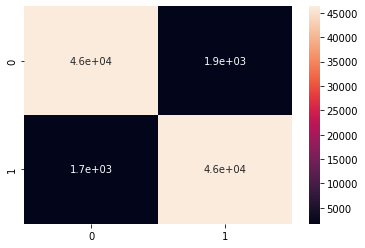

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred3), annot=True)

In [ ]:
y_pred_dttrain=dt.predict(X_train)

In [ ]:
dt_acc=accuracy_score(y_pred_dttrain,y_train)
dt_acc # training set accuracy- As we know DT tries to overfit the data, however, testing accuray is fairly close which denotes that it is a good model

0.9991705241752067

## Ensemble techniques

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=50)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred4=rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred4))

[[46282  1769]
 [  692 47359]]


In [ ]:
rf_acc=accuracy_score(y_test,y_pred4)
rf_acc

0.9743917920542756

In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     48051
           1       0.96      0.99      0.97     48051

    accuracy                           0.97     96102
   macro avg       0.97      0.97      0.97     96102
weighted avg       0.97      0.97      0.97     96102



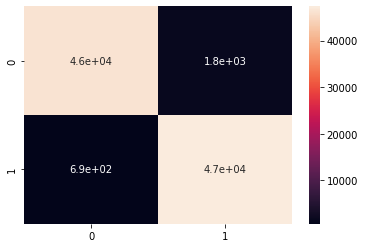

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred4), annot=True)

In [ ]:
fi=pd.DataFrame(rf.feature_importances_, index=X.columns).sort_values(by=0, ascending=False)
fi

,0
membership_duration,2.035891e-01
is_cancel,1.395293e-01
is_auto_renew,1.322047e-01
payment_method_id,8.502576e-02
logs_count,7.532261e-02
trans_count,4.623414e-02
plan_list_price,4.429923e-02
actual_amount_paid,2.981582e-02
num_50,2.585596e-02
payment_plan_days,2.541535e-02


In [ ]:
df1_plot = pd.DataFrame({'features':x_col,
                        'importances': rf.feature_importances_})
df1_plot = df1_plot.sort_values('importances', ascending=False)

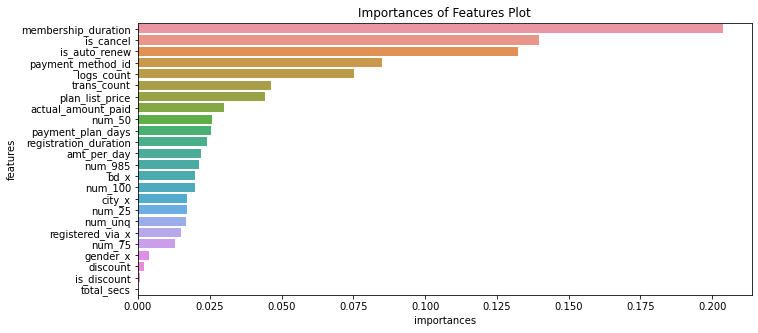

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x = df1_plot.importances, y = df1_plot.features)
plt.title('Importances of Features Plot')
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier(n_estimators=50)

In [ ]:
xg.fit(X_train,y_train)

XGBClassifier(n_estimators=50)

In [ ]:
y_pred5=xg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_pred5))

[[45346  2705]
 [ 2403 45648]]


In [ ]:
xg_acc=accuracy_score(y_test,y_pred5)
xg_acc

0.946848140517367

In [ ]:
print(classification_report(y_test,y_pred5))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95     48051
           1       0.94      0.95      0.95     48051

    accuracy                           0.95     96102
   macro avg       0.95      0.95      0.95     96102
weighted avg       0.95      0.95      0.95     96102



### CrossValidation

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

In [ ]:
skf=StratifiedKFold(10) 

In [ ]:
skfscore=cross_val_score(rf,X_sm,y_sm,cv=skf) # skfscore=cross_val_score(rf,X_sm,y_sm,cv=skf)

In [ ]:
skfscore.mean() # skfscore.mean() --->> 0.9747143659861397

0.9751451582693388

# Some Classification Visualizers

In [ ]:
from yellowbrick.classifier import DiscriminationThreshold

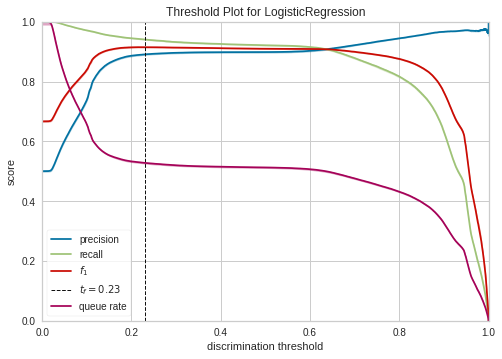

In [ ]:
model = LogisticRegression()
visualizer = DiscriminationThreshold(model)

visualizer.fit(X_sm, y_sm)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

Queue Rate: The “queue” is the spam folder or the inbox of the fraud investigation desk. This metric describes the percentage of instances that must be reviewed. If review has a high cost (e.g. fraud prevention) then this must be minimized with respect to business requirements; if it doesn’t (e.g. spam filter), this could be optimized to ensure the inbox stays clean.



In short, % of records that need to be checked

```
# This is formatted as code
```



In [ ]:
#model = LogisticRegression()
# visualizer = DiscriminationThreshold(dt)

# visualizer.fit(X_sm, y_sm)        # Fit the data to the visualizer
# visualizer.show()           # Finalize and render the figure

In [ ]:
import pickle

In [ ]:
pickle.dump(rf, open('kkboxchurpred.pkl','wb'))

In [ ]:
X_test.values

array([[-0.4858067 ,  1.42592177, -0.29932545, ...,  0.59157946,
        -0.13561846,  0.22971333],
       [ 0.6585804 , -0.49400997, -0.14415519, ..., -0.08664698,
        -0.11947775,  0.28244361],
       [-1.21418718,  0.73532604, -0.27202207, ...,  1.25932515,
        -0.11358948, -0.97106522],
       ...,
       [-0.02805186,  1.42592177, -0.76483625, ..., -1.10398663,
        -0.11947775, -0.73397791],
       [-1.17756652,  1.13360485, -0.76483625, ...,  0.59157946,
        -0.12657105, -0.52527114],
       [-1.63876674, -1.40141424,  0.38353188, ...,  0.2694219 ,
         2.60830269, -0.22582733]])